In [0]:
# 랜덤 포레스트 분석
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import pandas as pd

In [0]:
# 데이터 불러오기
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
# 데이터 크기 확인
train.shape , test.shape

((15035, 21), (6468, 20))

In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
# 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [6]:
train.columns  # Price가 있음

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
test.columns  # Price가 없음

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# train의 price 컬럼을 y에 저장
X_all = train.drop(['price'], axis=1)
y= train['price']

In [0]:
# 변수 고르기
sel=['bedrooms','bathrooms','sqft_living','sqft_lot']

X=X_all[sel]
y=train['price']

In [0]:
# 데이터 나누는 함수 불러오기
from sklearn.model_selection import train_test_split

In [0]:
# 데이터 나누기
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)

In [62]:
# 랜덤 포레스트 라이브러리 불러오기
# 모델 생성 및 학습
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
forest=RandomForestRegressor(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [63]:
# 학습된 모델의 트리 모델
print(forest.estimators_)

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1872583848, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=794921487, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_f

In [64]:
# 변수의 중요도
print(forest.feature_importances_)

[0.03934276 0.07187087 0.6741707  0.21461568]


In [0]:
# 변수의 중요도 그래프 찍기
import matplotlib.pyplot as plt
import numpy as np

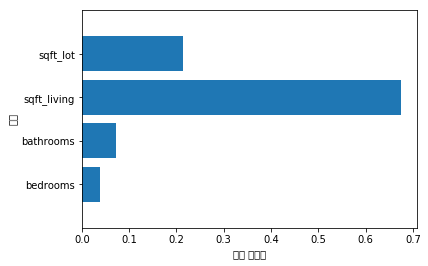

In [66]:
# 그래프 그리기
def plot_feature_importances_cancer(model, dataset):
  n_features=dataset.shape[1]
  plt.barh(range(n_features),model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), dataset.columns)
  plt.xlabel("특성 중요도")
  plt.ylabel("특성")
  plt.ylim(-1, n_features)
plot_feature_importances_cancer(forest, X)

In [67]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

FileNotFoundError: ignored

In [68]:
# 예측
pred=forest.predict(X_test)
pred

array([322990., 338498., 318200., ..., 224600., 450960., 329990.])

In [79]:
#
forest20= RandomForestRegressor(n_estimators=20, random_state=2, max_depth=3)
forest20.fit(X_train, y_train)
pred=forest20.predict(X_test)
pred

array([370702.63478344, 447200.51090179, 361075.95209664, ...,
       347666.86342103, 574916.75992482, 512042.65931907])

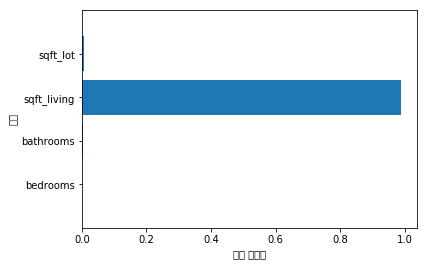

In [80]:
#
plot_feature_importances_cancer(forest20, X)

In [81]:
# 20 모델에 대한 평가
cnt=1
for model in forest20.estimators_:
  model.fit(X_train, y_train)

  if cnt % 5 == 0:
    print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))
  cnt+=1

훈련 세트 정확도 : 0.559
테스트 세트 정확도 : 0.432
훈련 세트 정확도 : 0.559
테스트 세트 정확도 : 0.432
훈련 세트 정확도 : 0.559
테스트 세트 정확도 : 0.432
훈련 세트 정확도 : 0.559
테스트 세트 정확도 : 0.432
